In [2]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from keras.optimizers import SGD
from bokeh.models import HoverTool, Callback
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
from keras.regularizers import l1
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [3]:

train_list = np.load('rnafold_autoencoder_train.np (2).npy')

In [4]:
train_list.shape

(202, 200, 200, 1)

In [5]:

adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [6]:
sgd = SGD(lr=0.1, momentum=0.5, decay=0.0000000001, nesterov=False)

In [75]:
autoencoder = Sequential()
train_shape = train_list.shape
# Encoder Layers
autoencoder.add(Conv2D(2, (2, 2), activation='relu', padding='same', input_shape=[ 200, 200, 1]))
autoencoder.add(Conv2D(3, (2, 2), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(3, (2, 2), activation='relu', padding='same'))
autoencoder.add(Conv2D(3, (2, 2), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())

autoencoder.add(Flatten())
autoencoder.add(Dense(3, name='bneck'))
autoencoder.add(Dense(30000,  activation='relu'))
print (autoencoder.summary())
autoencoder.add(Reshape( (100, 100, 3) ))

print (autoencoder.summary())

autoencoder.add(BatchNormalization())

autoencoder.add(Conv2D(5, (3, 3), activation='relu', padding='same'))
autoencoder.add(Conv2D(5, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(BatchNormalization())
autoencoder.add(Conv2D(5, (3, 3), activation='relu', padding='same'))
autoencoder.add(Conv2D(1, (2, 2), activation='sigmoid', padding='same'))




encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bneck').output)



autoencoder.compile(optimizer=sgd, loss='binary_crossentropy', )

print (autoencoder.summary())
autoencoder.fit(train_list[:180], train_list[:180],
                epochs=1000,
                batch_size=30,
                validation_data=(train_list[180:], train_list[180:]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_287 (Conv2D)          (None, 200, 200, 2)       10        
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 200, 200, 3)       27        
_________________________________________________________________
batch_normalization_147 (Bat (None, 200, 200, 3)       12        
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 100, 100, 3)       39        
_________________________________________________________________
conv2d_290 (Conv2D)          (None, 100, 100, 3)       39        
_________________________________________________________________
batch_normalization_148 (Bat (None, 100, 100, 3)       12        
__________

## Notes:
    The number of botle neck nodes are limitating to the compression
    

In [77]:
encoded_imgs = encoder.predict(train_list)
decoded_imgs = autoencoder.predict(train_list)




In [78]:
df_plot = pd.DataFrame(
    {'x':[x [2] for x in encoded_imgs.tolist()],
                        'y':[x [0] for x in encoded_imgs.tolist()],
                         'img':['http://0.0.0.0:8889/{}.png'.format(str(i)) for i in range(0, len(encoded_imgs)  )] }
                        )

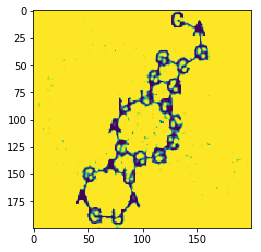

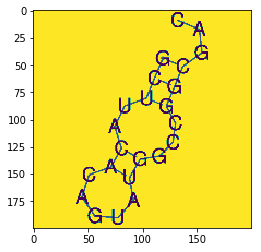

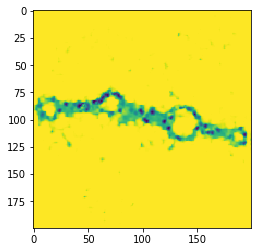

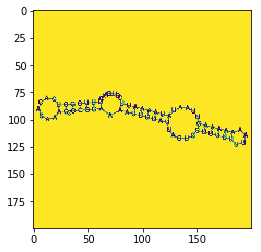

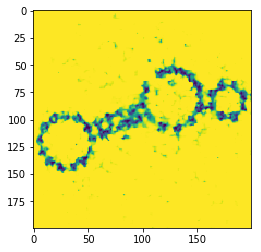

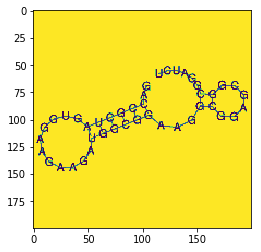

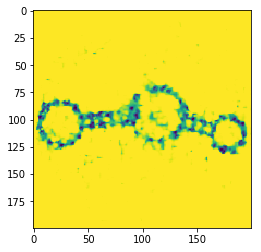

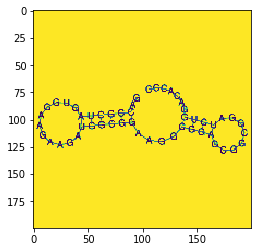

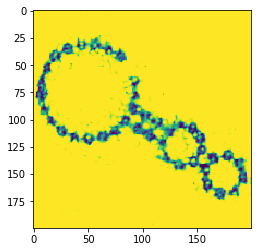

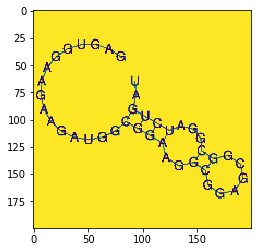

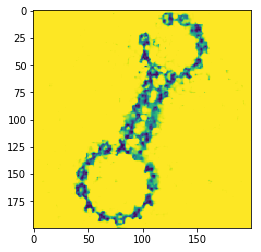

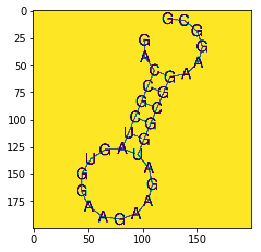

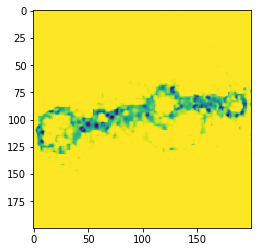

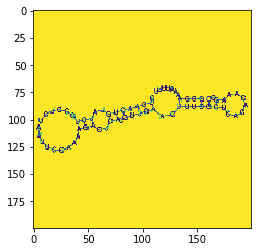

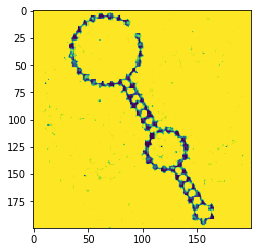

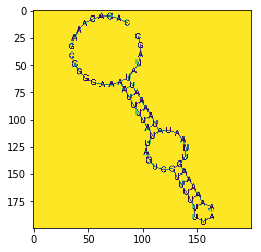

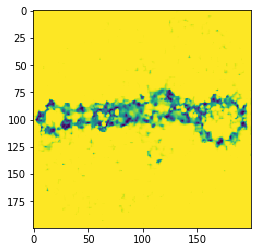

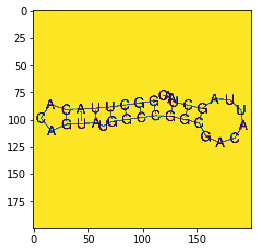

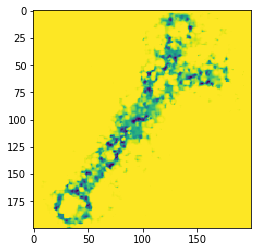

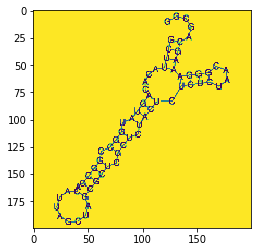

In [79]:
count = 0
for e, im in zip(decoded_imgs[:10], train_list[:10]) :
    
    plt.imshow(e.reshape(200,200))
    plt.show()

    plt.imshow(im.reshape(200,200))
    plt.savefig(str(count)+'.png')
    count +=1
    plt.show()
    

In [80]:

# Configure default tools for plots
TOOLS = 'box_zoom,box_select,resize,reset,save'

# Configure for output in the notebook
output_notebook()

source = ColumnDataSource(df_plot)

p = figure(title="Molecules", tools = TOOLS)
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'y'

# Make scatterplot
p.circle("x", "y", fill_alpha=0.2, size=10, source=source)


#source.add(df.Molecule.apply(lambda x: oenb.draw_mol_to_html(x,300,200)),name="img")

p = figure(title="test", tools=TOOLS)
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'y'

# Make scatterplot
p.circle("x", "y", fill_alpha=0.2, size=10, source=source)

# Create tooltips referencing stored images
tooltips = """<img src=@img>"""

# Connect tooltips to plot
p.add_tools(HoverTool(tooltips=tooltips))

# Uncomment to create a html file of the plot.
# output_file("bokeh_plot.html")

show(p)

Loading BokehJS ...

/Users/lxf453/miniconda2/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: ResizeTool is removed in Bokeh 0.12.7, adding it is a no-op. In the future, accessing ResizeTool will be an error
  warn(message)
/Users/lxf453/miniconda2/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: ResizeTool is removed in Bokeh 0.12.7, adding it is a no-op. In the future, accessing ResizeTool will be an error
  warn(message)


In [9]:
train_list.shape

(90, 200, 200, 1)

In [84]:
np.random([200,200,1])

TypeError: 'module' object is not callable

In [191]:
!find ../../Downloads/ | grep interaction

../../Downloads//files.interaction (1).txt.gz
../../Downloads//files.interaction (2).txt.gz
../../Downloads//files.interaction (3).txt.gz
../../Downloads//files.interaction (4).txt.gz
../../Downloads//files.interaction (5).txt.gz
../../Downloads//files.interaction (6).txt.gz
../../Downloads//files.interaction (7).txt.gz
../../Downloads//files.interaction.txt.gz
../../Downloads//files.interaction.txt.gz (1).tbi
../../Downloads//files.interaction.txt.gz (2).tbi
../../Downloads//files.interaction.txt.gz (3).tbi
../../Downloads//files.interaction.txt.gz (4).tbi
../../Downloads//files.interaction.txt.gz (5).tbi
../../Downloads//files.interaction.txt.gz (6).tbi
../../Downloads//files.interaction.txt.gz (7).tbi
../../Downloads//files.interaction.txt.gz (8).tbi
../../Downloads//files.interaction.txt.gz (9).tbi
../../Downloads//files.interaction.txt.gz.tbi
